In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Carregar os dados
df_aluguel = pd.read_csv('./datasets/dataset_aluguel.csv')

In [37]:
# Visualizando os dados
df_aluguel.head()

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [38]:
# Dropando a coluna id
df_aluguel.drop(columns=['id'], inplace=True)

In [39]:
# Renomeando as colunas para facilitar a leitura
df_aluguel.rename(columns={
    'localizacao_Periferia':'localizacao_periferia',
    'localizacao_Subúrbio':'localizacao_suburbio',
}, inplace=True)

In [40]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_periferia  100 non-null    bool   
 5   localizacao_suburbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [41]:
df_aluguel.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


# EDA

In [42]:
df_aluguel_eda = df_aluguel.copy()

In [43]:
# Verificando valores ausentes
df_aluguel_eda.isna().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_periferia    0
localizacao_suburbio     0
valor_aluguel            0
dtype: int64

In [44]:
df_aluguel_eda.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


<Axes: xlabel='tamanho_m2', ylabel='valor_aluguel'>

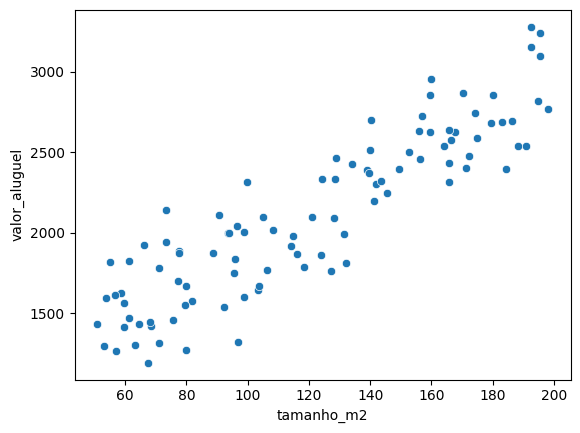

In [45]:
# Cruzamento de variáveis numéricas com valor do aluguel
sns.scatterplot(data=df_aluguel_eda, x="tamanho_m2", y="valor_aluguel")

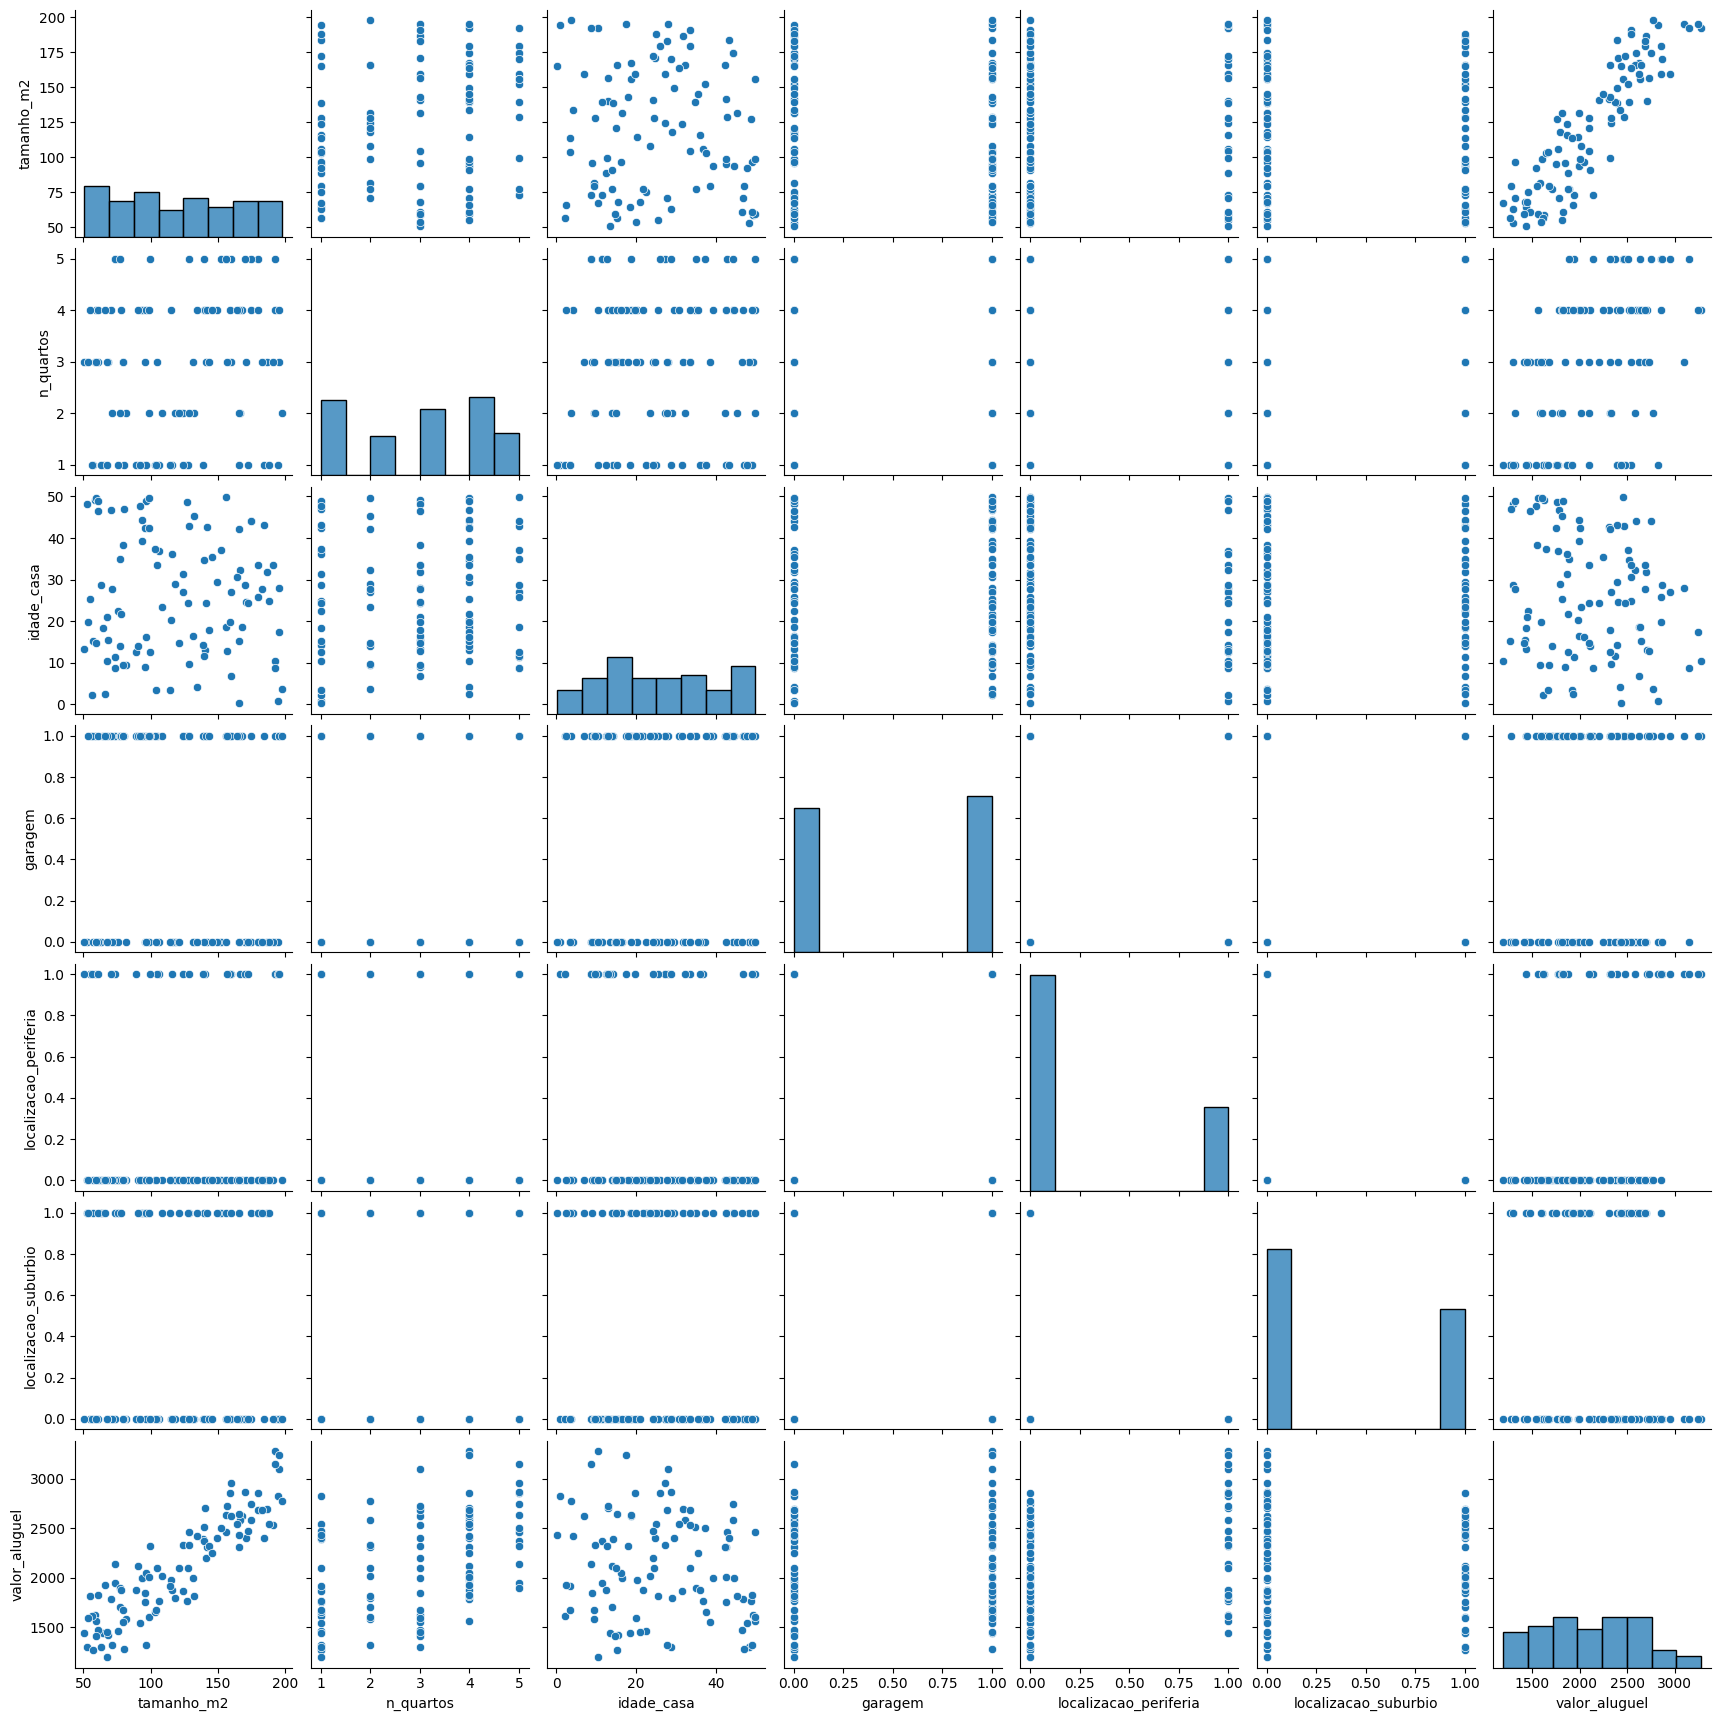

In [46]:
sns.pairplot(df_aluguel_eda)

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

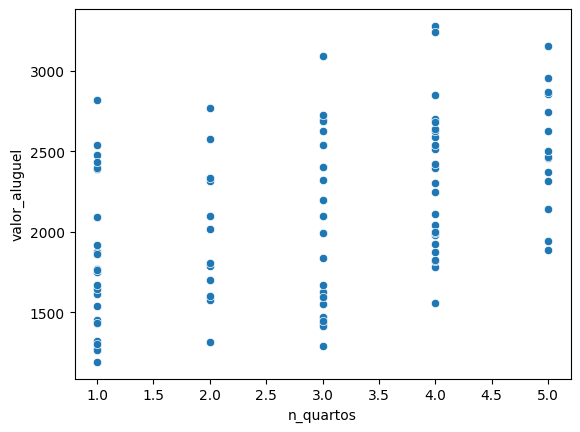

In [47]:
sns.scatterplot(data=df_aluguel_eda, x="n_quartos", y="valor_aluguel")

<Axes: >

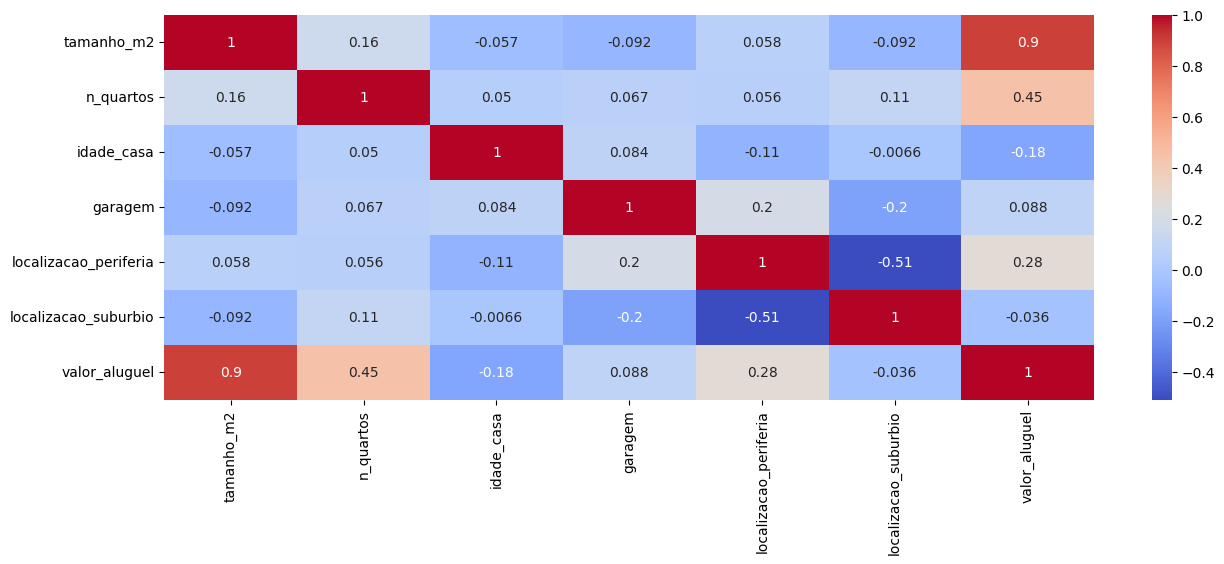

In [48]:
# Mapa de calor com correlação entre as variáveis
plt.figure(figsize=(15, 5))
sns.heatmap(df_aluguel_eda.corr(), annot=True, cmap='coolwarm')

<Axes: >

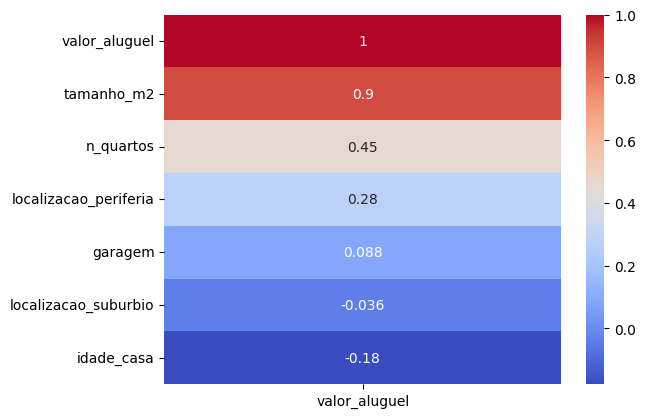

In [49]:
# Formato de ranking, somente correlação com a variável targe (valor_aluguel)
sns.heatmap(df_aluguel_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel', ascending=False), annot=True, cmap='coolwarm')

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

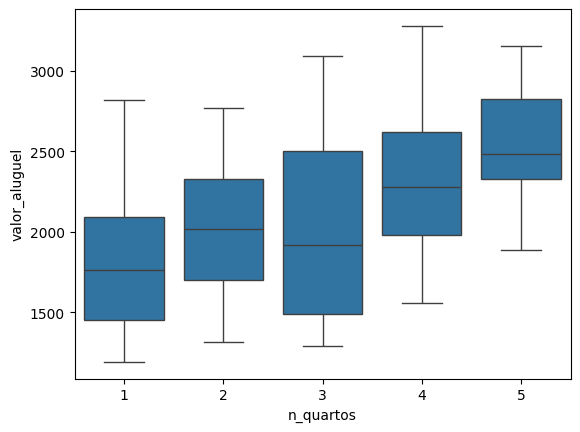

In [50]:
sns.boxplot(df_aluguel_eda, x='n_quartos', y='valor_aluguel')

In [51]:
# Codificar variáveis categóricas
df_aluguel = pd.get_dummies(df_aluguel, columns=['localizacao_periferia', 'localizacao_suburbio'], dtype='int64')

In [52]:
df_aluguel.head()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel,localizacao_periferia_False,localizacao_periferia_True,localizacao_suburbio_False,localizacao_suburbio_True
0,106.181018,1,36.760806,0,1767.122088,0,1,1,0
1,192.607146,4,10.453581,1,3278.742397,0,1,1,0
2,159.799091,5,27.072399,1,2953.899737,0,1,1,0
3,139.798773,4,34.789220,1,2514.717108,1,0,0,1
4,73.402796,5,11.427501,0,1942.164396,1,0,0,1


## Preparação e Treinamento do Modelo

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [54]:
X = df_aluguel.drop(columns=['valor_aluguel'], axis=1)
y = df_aluguel['valor_aluguel']

# Regressão Linear Simples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Pipeline

colunas_numericas = ['tamanho_m2', 'n_quartos', 'idade_casa', 'garagem']
transformer_numericas = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', transformer_numericas, colunas_numericas)
])

In [56]:
# Modelo
model_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Treino
print("Treinando o modelo...")
model_reg.fit(X_train, y_train)

Treinando o modelo...


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
# Gerar predição
y_pred = model_reg.predict(X_test)

In [58]:
# R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

R²: 0.9276209117890263
MAE: 114.06013243570244
MSE: 18860.592568586788
RMSE: 137.3338726192005


### Análise de resíduos

In [59]:
from scipy.stats import zscore

residuos = y_test - y_pred
residuos_std = zscore(residuos)

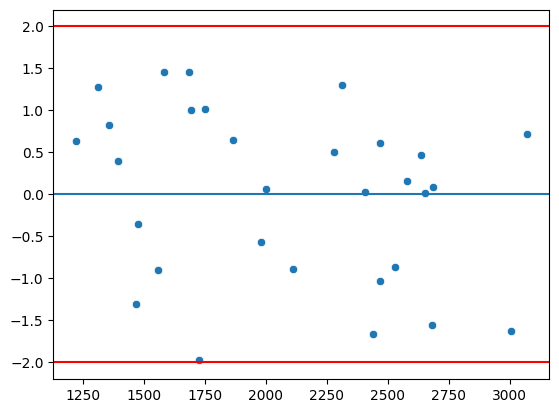

In [60]:
# Verificar a linearidade dos resíduos
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2, color='red')
plt.axhline(y=2, color='red')
plt.show()

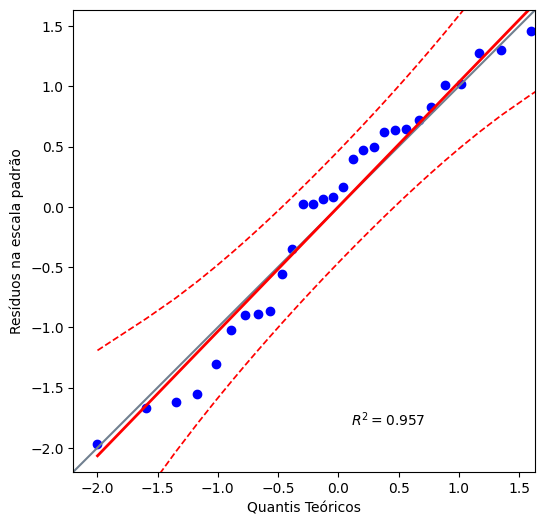

In [61]:
# Checar se resíduos seguem a distribuição normal usando QQPlot

import pingouin as pg

plt.figure(figsize=(10, 6))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [62]:
# Teste de normalidade de Shapiro-Wilk

from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [64]:
# Teste Shapiro-Wilk
stats_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Shapiro-Wilk - Estatística : {stats_shapiro}")
print(f"Shapiro-Wilk - P-valor:      {p_value_shapiro}")
print("\n")

# Teste de Kolmogorov-Smirnov
stats_ks, p_value_ks = kstest(residuos, 'norm')
print(f"KS - Estatística : {stats_ks}")
print(f"KS - P-valor:      {p_value_ks}")
print("\n")

# Teste de Lillie Fors
stats_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Lillie Fors - Estatística : {stats_ll}")
print(f"Lillie Fors - P-valor:      {p_value_ll}")
print("\n")

# Teste de Anderson-Darling
stats_and, critical_and, significance_and = anderson(residuos, dist='norm')
print(f"Anderson Darling - Estatística:   {stats_and}")
print(f"Anderson Darling - Valor Crítico: {critical_and[2]}")
print("\n")

# Teste de Homoscedasticidade de Goldfeld Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)

stats_goldfeld = test_goldfeld[0]
pvalue_goldfeld = test_goldfeld[1]

print(f"Goldfeld-Quandt - Estatística: {stats_goldfeld}")
print(f"Goldfeld-Quandt - P-Value:     {pvalue_goldfeld}")

Shapiro-Wilk - Estatística : 0.9420197752748278
Shapiro-Wilk - P-valor:      0.10310232970847459


KS - Estatística : 0.5
KS - P-valor:      1.8467310029604193e-07


Lillie Fors - Estatística : 0.14135905244579378
Lillie Fors - P-valor:      0.1340671650598504


Anderson Darling - Estatística:   0.5721759816911778
Anderson Darling - Valor Crítico: 0.712


Goldfeld-Quandt - Estatística: 0.9927414474107707
Goldfeld-Quandt - P-Value:     0.5047112914764978
